In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
text1.concordance('monstrous') #concordance shows every occurence of the words monstrous in the Moby Dick, together with some context

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [4]:
text1.similar('monstrous') #words that appear in similar range of context

curious untoward perilous careful puzzled imperial tyrannical modifies
candid true fearless domineering subtly horrible lamentable wise
doleful determined loving uncommon


In [5]:
text2.common_contexts(['monstrous','very']) #inspect the context shared by two words

is_pretty a_pretty a_lucky be_glad am_glad


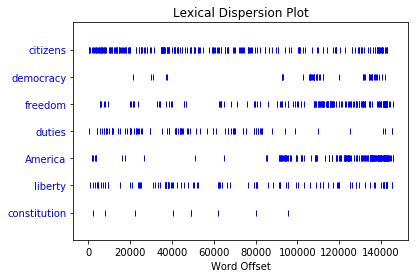

In [6]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America",'liberty','constitution']) # dispersion plot shows the position of word in the text

In [7]:
len(text3) # counting words or tokens that exist within the text (duplicates included)

44764

In [8]:
len(set(text3)) # count unique words (vocabulary richness)

2789

In [9]:
text3.count('smooth') # count specific words

2

In [10]:
text3.count('smooth')/len(text3)*100 # propotion of a specific word or word type

0.004467875971763024

In [11]:
def lexical_diversity(text):
    return len(set(text))/len(text)*100

def percentage(count, total):
    return count/total*100

In [12]:
lexical_diversity(text3)

6.230453042623537

In [13]:
percentage(text3.count('smooth'), len(text3))

0.004467875971763024

In [14]:
fdist1 = FreqDist(text1)

In [15]:
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [16]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [17]:
fdist1['whale']

906

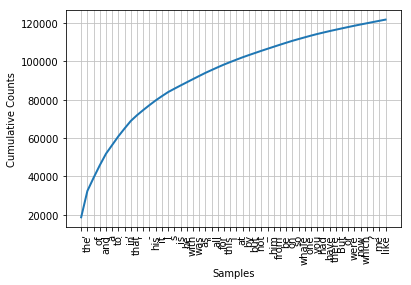

(None,)

In [18]:
fdist1.plot(50, cumulative=True),

In [19]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [30]:
# Conditional Frequency Distributions
from nltk.corpus import brown

genre_word = [(genre,word)
              for genre in ['news','romance']
              for word in brown.words(categories=genre)]

In [31]:
len(genre_word)

170576

In [35]:
genre_word[:4], genre_word[-4:]

([('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')],
 [('romance', 'afraid'),
  ('romance', 'not'),
  ('romance', "''"),
  ('romance', '.')])

In [39]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['romance', 'news']

In [40]:
print(cfd['news'])
print(cfd['romance'])

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


In [44]:
cfd['romance'].most_common()[:5]

[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502)]

In [43]:
cfd['news'].most_common()[:5]

[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146)]

In [62]:
# Plotting and Tabulating Distributions
from nltk.corpus import inaugural

cfd_inaugural = nltk.ConditionalFreqDist(
                                         (target,fileid[:4])
                                         for fileid in inaugural.fileids()
                                         for w in inaugural.words(fileid)
                                         for target in ['america','citizen']
                                         if w.lower().startswith(target))

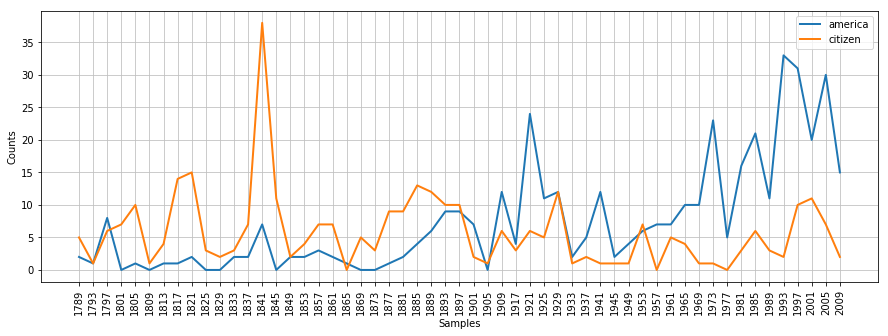

In [72]:
plt.subplots(figsize=(15,5))
cfd_inaugural.plot()

In [88]:
cfd_inaugural.tabulate(samples=['1789','1793','1797','1801','1805','1809'], cumulative=True)

        1789 1793 1797 1801 1805 1809 
america    2    3   11   11   12   12 
citizen    5    6   12   19   29   30 


In [89]:
# Generating Random Text with Bigrams
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [90]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [93]:
cfd['living']

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [94]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

In [97]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [98]:
plural('fairy'),plural('woman')

('fairies', 'women')